In [60]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import pandas as pd
import glob
import os

In [104]:
cols = ["Perimetre", "Nature", "Date", "Heures", "y", "Thermique", "Nucleaire", "Eolien", "Solaire", "Hydraulique", "Pompage", "Bioenergies", "Ech. physiques"]

In [107]:
path = "data"
all_files = glob.glob(os.path.join(path, "*.xls"))
df = pd.concat((pd.read_csv(f, names=cols, sep='\t', skiprows=1, index_col=False) for f in all_files))

C:\Users\adoni\AppData\Local\Temp\ipykernel_7244\3048580376.py:3: ParserWarning:

Length of header or names does not match length of data. This leads to a loss of data with index_col=False.

C:\Users\adoni\AppData\Local\Temp\ipykernel_7244\3048580376.py:3: ParserWarning:

Length of header or names does not match length of data. This leads to a loss of data with index_col=False.



In [109]:
df.drop(columns=["Perimetre", "Nature"], inplace=True)


In [110]:
df.head()

,Date,Heures,y,Thermique,Nucleaire,Eolien,Solaire,Hydraulique,Pompage,Bioenergies,Ech. physiques
0,2016-01-01,00:00,8885.0,293.0,-,18.0,0.0,10.0,-,137.0,8428.0
1,2016-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,00:30,8709.0,309.0,-,16.0,0.0,10.0,-,148.0,8226.0
3,2016-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,01:00,8343.0,309.0,-,13.0,0.0,10.0,-,149.0,7864.0


In [111]:
for column in df.columns:
    print(column, df[column].nunique())

Date 1827
Heures 96
y 9683
Thermique 1883
Nucleaire 1
Eolien 106
Solaire 108
Hydraulique 16
Pompage 1
Bioenergies 146
Ech. physiques 8840


In [112]:
df.drop(columns=["Nucleaire", "Pompage", "Hydraulique"], inplace=True)

In [113]:
df["ds"] = df["Date"].astype(str) + " " + df["Heures"].astype(str)

In [114]:
timeseries = df[["ds", "y"]]

In [115]:
timeseries.head()

,ds,y
0,2016-01-01 00:00,8885.0
1,2016-01-01 00:15,NaN
2,2016-01-01 00:30,8709.0
3,2016-01-01 00:45,NaN
4,2016-01-01 01:00,8343.0


In [116]:
m = Prophet()
m.fit(timeseries)

10:22:10 - cmdstanpy - INFO - Chain [1] start processing
10:23:34 - cmdstanpy - INFO - Chain [1] done processing


In [117]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
88056,2021-12-27 23:30:00
88057,2021-12-28 23:30:00
88058,2021-12-29 23:30:00
88059,2021-12-30 23:30:00
88060,2021-12-31 23:30:00


In [118]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
88056,2021-12-27 23:30:00,8807.894417,-4211.742384,22511.455440
88057,2021-12-28 23:30:00,8770.333139,-4504.743771,22387.791411
88058,2021-12-29 23:30:00,8843.688179,-4330.371035,22588.116498
88059,2021-12-30 23:30:00,8773.772167,-4371.392642,22207.251946
88060,2021-12-31 23:30:00,8515.381664,-4584.479795,22346.288865


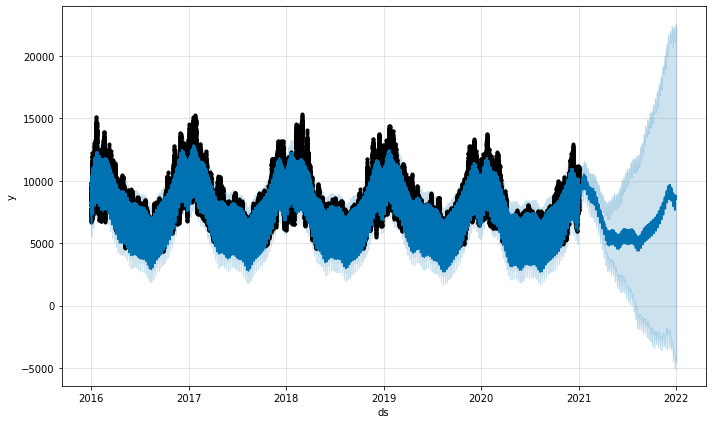

In [119]:
fig1 = m.plot(forecast)

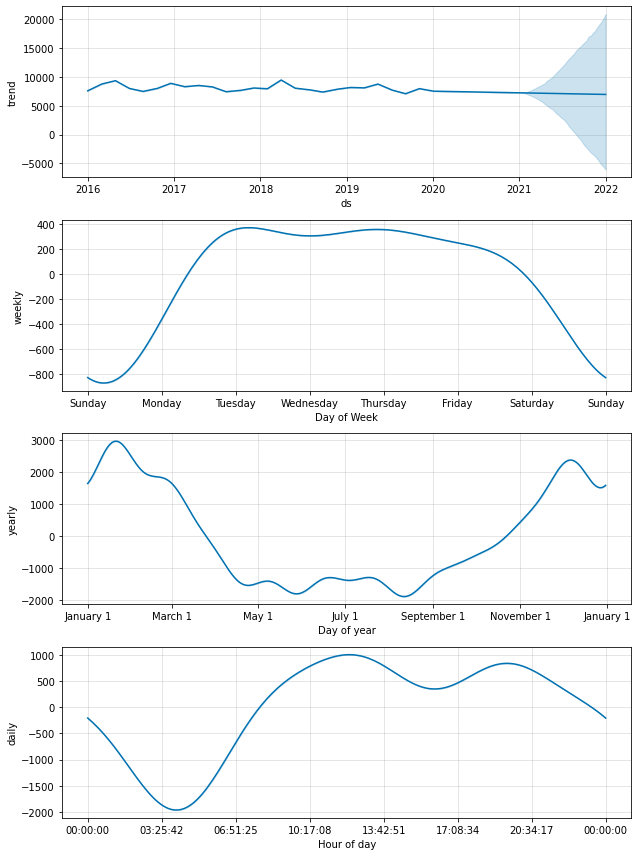

In [120]:
fig2 = m.plot_components(forecast)

In [58]:
plot_plotly(m, forecast)

In [59]:
plot_components_plotly(m, forecast)